# Assignment 2 - Exploring the Dataset

## Import statements: Useful tools

In [1]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

## Loading the data

In [2]:
missing_values = ["n/a", "na", "--","NAN"]
train = pd.read_csv('train.csv',na_values = missing_values)
ext_data = pd.read_csv('datafile2.csv',na_values = missing_values)

# print(ext_data.shape)
# ext_data.head()
print(ext_data.dtypes)

Unnamed: 0               int64
id                       int64
name                    object
brand                   object
base_name               object
screen_size            float64
pixels_x                 int64
pixels_y                 int64
screen_surface          object
touchscreen              int64
cpu                     object
cpu_details             object
detachable_keyboard    float64
discrete_gpu             int64
gpu                     object
os                      object
os_details              object
ram                      int64
ssd                      int64
storage                  int64
weight                 float64
min_price              float64
max_price              float64
cpu_brand               object
cpu_type_name           object
gpu_brand               object
gpu_type                object
os_details_2            object
cpu_details_2           object
diff_price             float64
dtype: object


## Cleaning up the data

In [3]:
ext_data = ext_data.drop(columns='Unnamed: 0')
ext_data = ext_data.drop(columns='id')
ext_data = ext_data.drop(columns='base_name')
ext_data = ext_data.drop(columns='cpu_details')
ext_data = ext_data.drop(columns='os_details')
ext_data = ext_data.drop(columns='gpu_type')
ext_data = ext_data.drop(columns='cpu_details_2')
ext_data = ext_data.drop(columns='cpu_type_name')
ext_data = ext_data.drop(columns='name')



In [4]:
columns = ext_data.columns
print(columns)

Index(['brand', 'screen_size', 'pixels_x', 'pixels_y', 'screen_surface', 'touchscreen', 'cpu', 'detachable_keyboard', 'discrete_gpu', 'gpu', 'os', 'ram', 'ssd', 'storage', 'weight', 'min_price', 'max_price', 'cpu_brand', 'gpu_brand', 'os_details_2', 'diff_price'], dtype='object')


## Identifying missing values

In [5]:
ext_data.describe()

,screen_size,pixels_x,pixels_y,touchscreen,detachable_keyboard,discrete_gpu,ram,ssd,storage,weight,min_price,max_price,diff_price
count,510.000000,510.000000,510.000000,510.000000,506.000000,510.000000,510.000000,510.000000,510.000000,506.000000,510.000000,510.000000,510.000000
mean,14.648235,1865.972549,1074.564706,0.347059,0.035573,0.290196,9.590196,198.909804,574.749020,4.197925,793.677686,829.228000,35.550314
std,1.606050,565.111787,354.346764,0.476502,0.185407,0.454298,6.246940,244.424611,517.445695,1.342661,543.619499,570.076909,79.722248
min,10.100000,1280.000000,768.000000,0.000000,0.000000,0.000000,2.000000,0.000000,16.000000,1.370000,69.000000,76.000000,0.000000
25%,13.300000,1366.000000,768.000000,0.000000,0.000000,0.000000,4.000000,0.000000,128.000000,3.020000,380.110000,399.225000,0.000000
50%,15.600000,1920.000000,1080.000000,0.000000,0.000000,0.000000,8.000000,128.000000,500.000000,4.310000,638.500000,649.000000,6.610000
75%,15.600000,1920.000000,1080.000000,1.000000,0.000000,1.000000,16.000000,256.000000,1000.000000,4.935000,1099.742500,1179.742500,35.032500
max,17.300000,3840.000000,2160.000000,1.000000,1.000000,1.000000,64.000000,2000.000000,4000.000000,9.740000,2999.110000,2999.110000,900.110000


In [6]:
ext_data.describe(include='object')

,brand,screen_surface,cpu,gpu,os,cpu_brand,gpu_brand,os_details_2
count,510,498,510,508,508,510,508,508
unique,18,2,23,73,4,6,6,20
top,DELL,GLOSSY,INTEL CORE I7,INTEL UHD 620,WINDOWS,INTEL,INTEL,10 HOME
freq,108,270,181,69,431,457,314,253


In [7]:
# All Columns with at least one empty cell (nan)
for i in range(0,len(columns)):
    if not ext_data[ext_data[columns[i]].isnull()].empty:
        print(i , columns[i])
        
# ext_data[ext_data[columns[1]]]

4 screen_surface
7 detachable_keyboard
9 gpu
10 os
14 weight
18 gpu_brand
19 os_details_2


In [8]:
# Unique values of a column
for i in range(0,len(columns)):
# print(columns[i])
    if len(ext_data[columns[i]].unique()) < 30:
        print("")
        print(columns[i])
        print(ext_data[columns[i]].unique())
# ext_data[columns[i]].isnull().unique()


brand
['LENOVO' 'RAZER' 'HP' 'ACER' 'ASUS' 'DELL' 'MSI' 'APPLE' 'SAMSUNG'
 'MICROSOFT' 'OTHER' 'ALIENWARE' 'HUAWEI' 'LG' 'RCA' 'TOSHIBA' 'GOOGLE'
 'JUMPER']

screen_size
[15.6 17.3 11.6 14.  15.  12.3 13.3 12.5 12.  16.  10.1 13.5 13.9 15.4
 17.  12.2 10.8]

pixels_x
[1920 1366 1600 3840 2400 1280 2736 2304 3200 3072 2256 3000 2560 2160
 2880 1440 3240]

pixels_y
[1080  768  900 2160 1600  800 1824 1440 1800 1920 1200 1504 2000 1280]

screen_surface
['GLOSSY' 'MATTE' nan]

touchscreen
[1 0]

cpu
['INTEL CORE I7' 'AMD A6' 'INTEL CORE I3' 'INTEL CORE I5' 'INTEL CELERON'
 'AMD RYZEN 5' 'AMD A8' 'INTEL PENTIUM' 'OP1' 'AMD RYZEN 3' 'AMD A12'
 'INTEL CORE M3' 'INTEL CORE I9' 'INTEL ATOM' 'AMD E2' 'ROCKCHIP' 'AMD A9'
 'MEDIATEK' 'AMD RYZEN 7' 'SAMSUNG EXYNOS' 'INTEL XEON' 'AMD FX' 'AMD A10']

detachable_keyboard
[ 0. nan  1.]

discrete_gpu
[0 1]

os
['WINDOWS' 'CHROME OS' 'MACOS' 'ANDROID' nan]

ram
[ 8 16  6  4  2 64 32 12  3]

ssd
[   0  512   16  256   32  128    8 2000  500   64  180 100

## Data Visualization

The Distribution of the difference in max and min price for different laptop brands can be usefull to check how the prices deviate for different instances. 

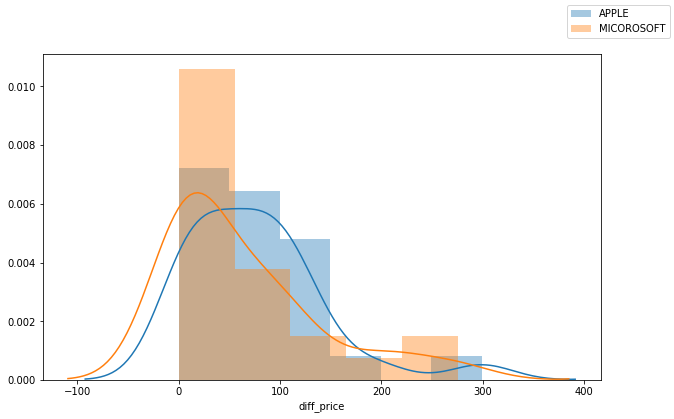

In [9]:
fig = plt.figure(figsize=(10,6))

df_temp1 = ext_data.loc[ext_data['brand'] == 'APPLE']
# df_temp2 = ext_data.loc[ext_data['brand'] == 'GOOGLE']
df_temp3 = ext_data.loc[ext_data['brand'] == 'MICROSOFT']

sns.distplot(df_temp1['diff_price'])
# sns.distplot(df_temp2['diff_price'])
sns.distplot(df_temp3['diff_price'])

fig.legend(labels=['APPLE','MICOROSOFT'])
plt.show()

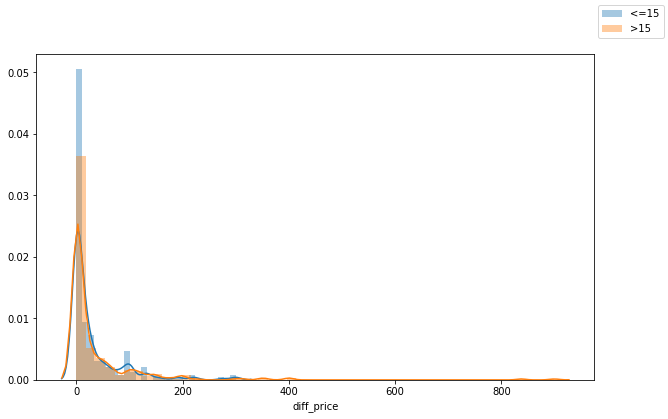

In [10]:
fig = plt.figure(figsize=(10,6))

df_temp1 = ext_data.loc[ext_data['screen_size'] <= 15.0]
df_temp2 = ext_data.loc[ext_data['screen_size'] > 15.0]
# df_temp3 = ext_data.loc[ext_data['brand'] == 'MICROSOFT']

sns.distplot(df_temp1['diff_price'])
sns.distplot(df_temp2['diff_price'])
# sns.distplot(df_temp3['diff_price'])

fig.legend(labels=['<=15','>15'])
plt.show()

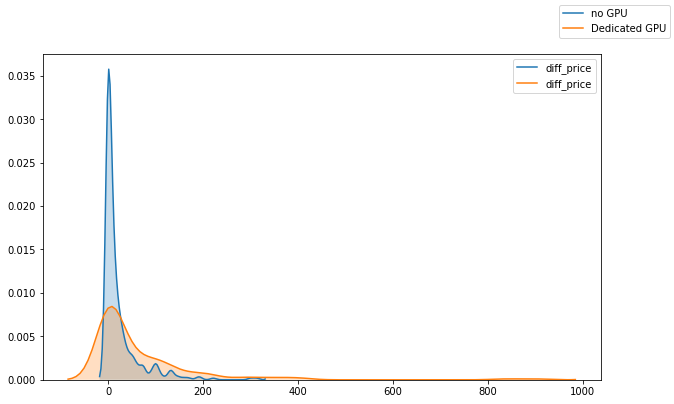

In [11]:
## Whether having a discrete gpu affects the price variation
fig = plt.figure(figsize=(10,6))

df_temp1 = ext_data.loc[ext_data['discrete_gpu'] == 0]
df_temp2 = ext_data.loc[ext_data['discrete_gpu'] == 1]
# df_temp3 = ext_data.loc[ext_data['brand'] == 'MICROSOFT']

# sns.distplot(df_temp1['diff_price'])
# sns.distplot(df_temp2['diff_price'])
sns.kdeplot(df_temp1['diff_price'], shade=True)
sns.kdeplot(df_temp2['diff_price'], shade=True)
# sns.distplot(df_temp3['diff_price'])

fig.legend(labels=['no GPU','Dedicated GPU'])
plt.show()

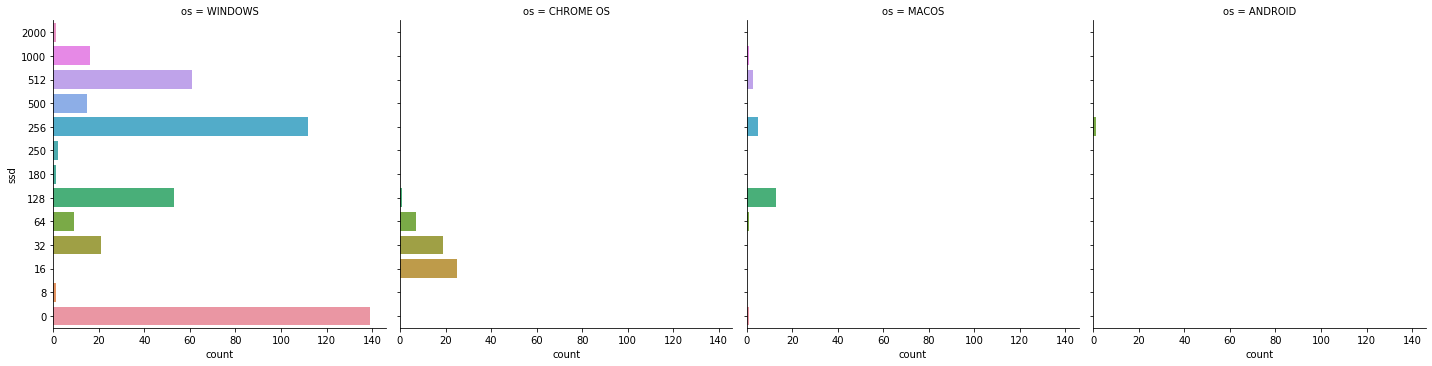

In [12]:
## Showing the # of instances for each ssd size per type of OS
sns.catplot(y='ssd', col='os', data=ext_data, kind='count')

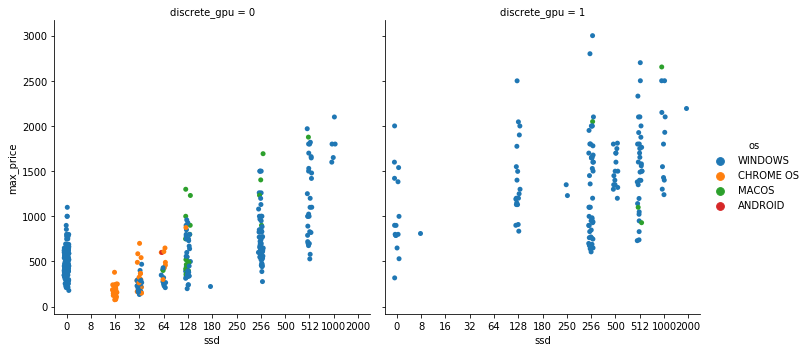

In [20]:
sns.catplot(x='ssd',y='max_price',hue='os',col='discrete_gpu',data=ext_data, kind='strip')

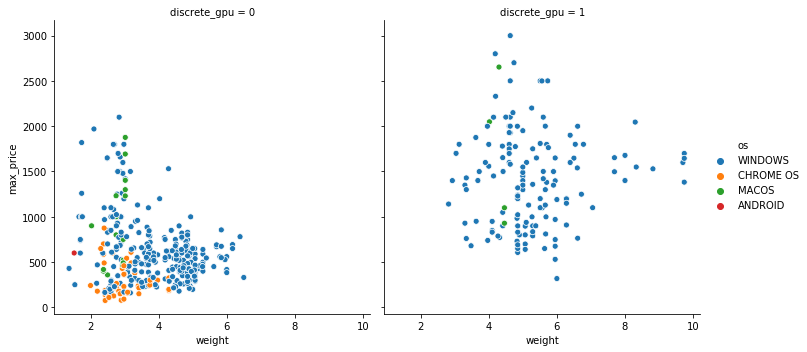

In [31]:
sns.relplot(x='weight',y='max_price',col='discrete_gpu',hue='os',data=ext_data)

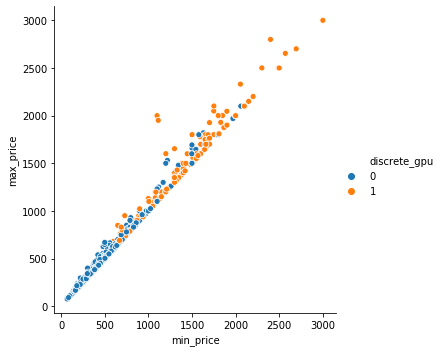

In [34]:
sns.relplot(x='min_price',y='max_price',hue='discrete_gpu',data=ext_data)

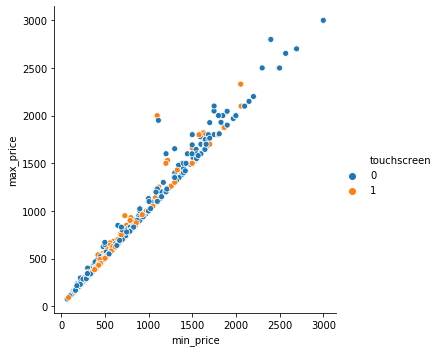

In [37]:
sns.relplot(x='min_price',y='max_price',hue='touchscreen',data=ext_data)

## Data Aggregation

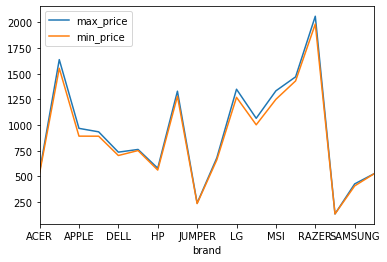

In [45]:
temp_data = ext_data[['brand','screen_size','touchscreen','discrete_gpu','ram','ssd',
                      'min_price','max_price','diff_price']]
agg_data = temp_data.groupby(temp_data['brand']).aggregate({'screen_size':'mean',
                                                               'touchscreen':'sum',
                                                               'discrete_gpu':'sum',
                                                               'ram':'mean',
                                                               'ssd':'mean',
                                                               'min_price':'mean',
                                                               'max_price':'mean',
                                                               'diff_price':'mean'}, index=False)
agg_data.reset_index(inplace=True)

agg_data.plot(x='brand',y=['max_price','min_price'])

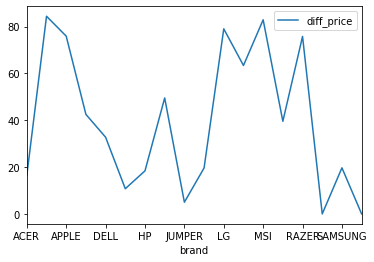

In [69]:
agg_data.plot(x='brand',y=['diff_price'])

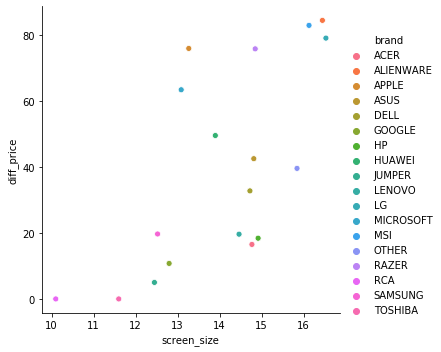

In [57]:
sns.relplot(x='screen_size',y='diff_price',hue='brand',data=agg_data)

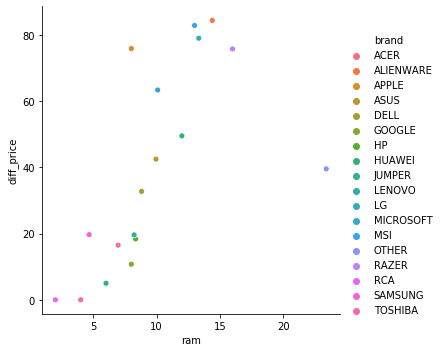

In [56]:
sns.relplot(x='ram',y='diff_price',hue='brand',data=agg_data)

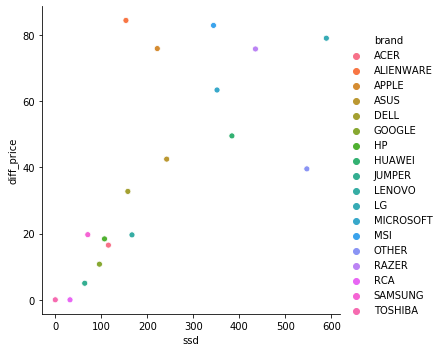

In [55]:
sns.relplot(x='ssd',y='diff_price',hue='brand',data=agg_data)